# Projeto Teste Udemy
##### Nesse projeto, estarei limpando uma base de dados genérica fornecida pela Udemy
---

1. Primeiramente, precisamos importar algumas bibliotecas que serão úteis para a limpeza do conjunto de dados.

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

2. Ao importar os dados, defino uma variável para o dataframe e assim utilizá-la com maior facilidade.

In [2]:
df = pd.read_csv("tempo.csv", sep=";") #Importa os dados.

3. Esse é o conjunto de dados a ser tratado:

In [3]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


4. Os outputs possíveis para cada coluna são:
    - `Aparencia`: sol / nublado / chuva
    - `Temperatura`: -135 ~ 130 F
    - `Umidade`: 0 ~ 100
    - `Vento`: FALSO / VERDADEIRO
    - `Jogar`: sim / nao

5. Verifico o número de linhas e de colunas, respectivamente.

In [4]:
df.shape

(14, 5)

6. Verifico quantos `NaN` estão presentes no conjunto de dados.

In [5]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

7. Vejo todos os valores presentes no conjunto de dados na coluna `Aparencia`.

In [6]:
agrupado = df.groupby(["Aparencia"]).size() #Verifica a frequência de cada valor.
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

8. Para facilitar a visualização, coloco todos os outputs em um gráfico de colunas.

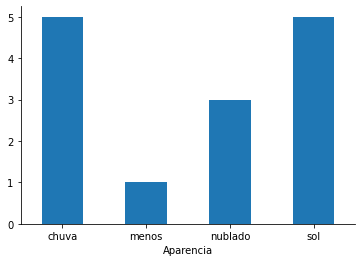

In [7]:
agrupado.plot.bar()
plt.xticks(rotation=0) #Mostra os dados do eixo X na horizontal.
srn.despine() #Remove as bordas de cima e da direita do gráfico.
plt.show()

9. Como há um valor diferente do esperado, atribuo a ele o valor da moda (valor de maior frequência) da coluna `Aparencia`.

In [8]:
moda = sts.mode(df['Aparencia']) #Calcula o valor da moda.

In [9]:
df.loc[df['Aparencia'] == "menos", 'Aparencia'] = moda

In [10]:
agrupado = df.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

10. Para a coluna `Temperatura`, verifico todos os valores fora do esperado e os substituo pela mediana dessa coluna.

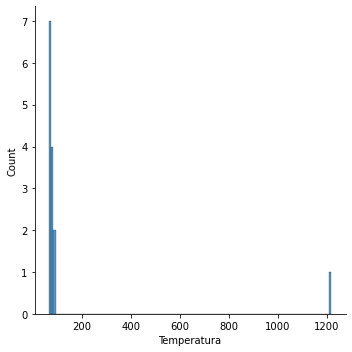

In [11]:
agrupado = srn.displot(df['Temperatura']) #Cria um histograma.
plt.show()

In [12]:
df.loc[(df['Temperatura'] < -135) | (df['Temperatura'] > 130)] #Localiza os valores que atendem à condição.

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [13]:
mediana = sts.median(df['Temperatura'])
mediana

73.5

In [14]:
df.loc[(df['Temperatura'] < -135) | (df['Temperatura'] > 130), 'Temperatura'] = mediana

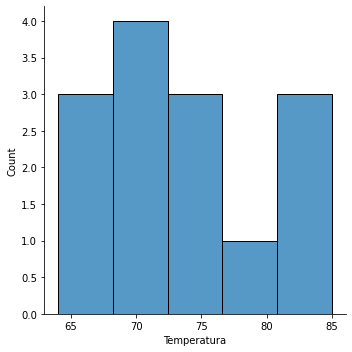

In [15]:
agrupado = srn.displot(df['Temperatura'])
plt.show()

11. Verifico se há valores `NaN` na coluna `Umidade` e, caso haja, os substituo pela mediana da coluna. Por fim, confirmo que não há mais valores nulos.

In [16]:
df['Umidade'].isnull().sum()

1

In [17]:
mediana = sts.median(df['Umidade'])
mediana

85.5

In [18]:
df['Umidade'].fillna(mediana, inplace=True) #Altera os valores NaN para a mediana da coluna.

In [19]:
df['Umidade'].isnull().sum()

0

12. Analiso se há algum valor fora do esperado. Caso haja, irei modificá-lo para o valor da mediana da coluna.

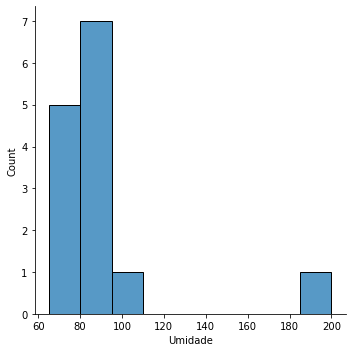

In [20]:
agrupado = srn.displot(df['Umidade'])
plt.show()

In [21]:
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [22]:
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100), 'Umidade'] = mediana

In [23]:
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


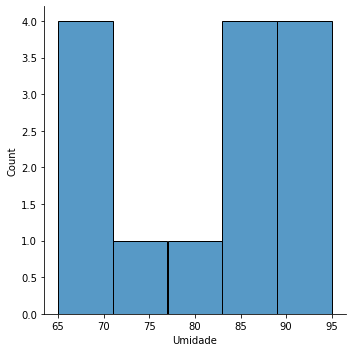

In [24]:
agrupado = srn.displot(df['Umidade'])
plt.show()

13. Verifico se há algum valor `NaN` ou valores que não sejam esperados e, caso haja, os converto para a moda da coluna.

In [25]:
df['Vento'].isnull().sum()

1

In [26]:
df.groupby(['Vento']).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [27]:
df.loc[(df['Vento'] != 'FALSO') & (df['Vento'] != 'VERDADEIRO')]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,85.5,NaN,sim


In [28]:
moda = sts.mode(df['Vento'])
moda

'FALSO'

In [29]:
df.loc[(df['Vento'] != 'FALSO') & (df['Vento'] != 'VERDADEIRO'), 'Vento'] = moda

In [30]:
df.loc[(df['Vento'] != 'FALSO') & (df['Vento'] != 'VERDADEIRO')]

,Aparencia,Temperatura,Umidade,Vento,Jogar


14. Para a coluna `Jogar`, verifico que não há nenhum valor fora do esperado, logo não foi necessária nenhuma mudança.

In [31]:
df.groupby(['Jogar']).size()

Jogar
nao    5
sim    9
dtype: int64

15. Por último, observo o conjunto de dados tratado.

In [32]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim


#### Um exemplo de análise descritiva dos dados:
   - É possível notar que nos dias extremos, em que a temperatura e umidade estavam muito altas ou muito baixas, o atleta não jogou. Já em dias com valores médios o atleta competiu.
   - No dia em que se observou a menor temperatura e a menor umidade o atleta jogou, caracterizando um outlier. Talvez esse dia tenha sido uma final de campeonato ou um jogo contra um rival importante.

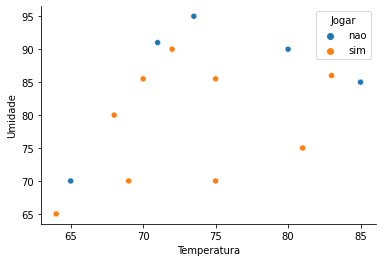

In [33]:
srn.scatterplot(data=df, x='Temperatura', y='Umidade', hue='Jogar') #Cria um gráfico de dispersão Temperatura x Umidade e informa se o atleta jogou ou não em cada dia.
srn.despine()
plt.show()